# Init

---


In [1]:
import xarray as xr
from dask.distributed import Client
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
from cartopy import crs, feature

# set plotly as default backend for pandas
pd.options.plotting.backend = "plotly"

In [2]:
Client()

<Client: 'tcp://127.0.0.1:52915' processes=4 threads=12, memory=48.00 GiB>

In [3]:
stations = ["CALCOFI", "PAPA", "BATS", "HOT"]

In [4]:
data = {key: xr.open_zarr(f"../release/{key}_zooplankton.zarr") for key in stations}

In [5]:
for key, ds in data.items():
    print(f"Dataset {key} has dimensions: {ds.dims}")
    display(ds)

Dataset CALCOFI has dimensions: FrozenMappingWarningOnValuesAccess({'time': 7796, 'latitude': 55, 'longitude': 103, 'layer': 1})


<xarray.Dataset> Size: 353MB
Dimensions:    (time: 7796, latitude: 55, longitude: 103, layer: 1)
Coordinates:
  * latitude   (latitude) float64 440B 0.5 1.5 2.5 3.5 ... 51.5 52.5 53.5 54.5
  * layer      (layer) int64 8B 0
  * longitude  (longitude) float64 824B -179.5 -178.5 -177.5 ... -78.5 -77.5
  * time       (time) datetime64[ns] 62kB 1951-01-09 1951-01-10 ... 2023-01-25
Data variables:
    day        (time, latitude, longitude, layer) float32 177MB dask.array<chunksize=(7796, 10, 10, 1), meta=np.ndarray>
    night      (time, latitude, longitude, layer) float32 177MB dask.array<chunksize=(7796, 10, 10, 1), meta=np.ndarray>
Attributes:
    creation date:  2025-07-09T13:29:28.222363
    station:        CALCOFI

Dataset PAPA has dimensions: FrozenMappingWarningOnValuesAccess({'time': 623, 'latitude': 12, 'longitude': 26, 'layer': 1})


<xarray.Dataset> Size: 3MB
Dimensions:    (time: 623, latitude: 12, longitude: 26, layer: 1)
Coordinates:
  * latitude   (latitude) float64 96B 46.5 47.5 48.5 49.5 ... 55.5 56.5 57.5
  * layer      (layer) int64 8B 0
  * longitude  (longitude) float64 208B -156.5 -153.5 -152.5 ... -129.5 -128.5
  * time       (time) datetime64[ns] 5kB 1995-09-24 1995-09-25 ... 2020-08-31
Data variables:
    day        (time, latitude, longitude, layer) float64 2MB dask.array<chunksize=(623, 5, 5, 1), meta=np.ndarray>
    night      (time, latitude, longitude, layer) float64 2MB dask.array<chunksize=(623, 5, 5, 1), meta=np.ndarray>
Attributes:
    creation date:  2025-07-09T13:28:41.839086
    station:        PAPA

Dataset BATS has dimensions: FrozenMappingWarningOnValuesAccess({'time': 538, 'latitude': 1, 'longitude': 1, 'layer': 1})


<xarray.Dataset> Size: 13kB
Dimensions:    (time: 538, latitude: 1, longitude: 1, layer: 1)
Coordinates:
  * latitude   (latitude) float64 8B 31.6
  * layer      (layer) int64 8B 0
  * longitude  (longitude) float64 8B -64.2
  * time       (time) datetime64[ns] 4kB 1995-05-10 1995-05-11 ... 2022-12-13
Data variables:
    day        (time, latitude, longitude, layer) float64 4kB dask.array<chunksize=(538, 1, 1, 1), meta=np.ndarray>
    night      (time, latitude, longitude, layer) float64 4kB dask.array<chunksize=(538, 1, 1, 1), meta=np.ndarray>
Attributes:
    creation date:  2025-07-09T13:27:08.333899
    station:        BATS

Dataset HOT has dimensions: FrozenMappingWarningOnValuesAccess({'time': 546, 'latitude': 1, 'longitude': 1, 'layer': 1})


<xarray.Dataset> Size: 13kB
Dimensions:    (time: 546, latitude: 1, longitude: 1, layer: 1)
Coordinates:
  * latitude   (latitude) float64 8B 22.75
  * layer      (layer) int64 8B 0
  * longitude  (longitude) int64 8B -158
  * time       (time) datetime64[ns] 4kB 1994-02-17 1994-02-18 ... 2022-09-02
Data variables:
    day        (time, latitude, longitude, layer) float64 4kB dask.array<chunksize=(546, 1, 1, 1), meta=np.ndarray>
    night      (time, latitude, longitude, layer) float64 4kB dask.array<chunksize=(546, 1, 1, 1), meta=np.ndarray>
Attributes:
    creation date:  2025-07-09T14:36:38.866593
    station:        HOT

In [6]:
mean_zoo = {key: value.mean("layer").to_dataframe() for key, value in data.items()}

In [7]:
mean_zoo = {
    key: pd.Series(np.nanmean(value, axis=1), index=value.index).dropna()
    for key, value in mean_zoo.items()
}

/var/folders/z_/8j3qx1mn0299kkpjgz9g53780000gq/T/ipykernel_18576/2047535233.py:2: RuntimeWarning: Mean of empty slice
  key: pd.Series(np.nanmean(value, axis=1), index=value.index).dropna()


In [8]:
mean_zoo = pd.DataFrame(mean_zoo)
mean_zoo

CALCOFI  PAPA  BATS  HOT
time       latitude longitude                           
1951-01-09 28.5     -115.5     4.170915   NaN   NaN  NaN
           29.5     -117.5     2.540567   NaN   NaN  NaN
           30.5     -116.5     2.324261   NaN   NaN  NaN
1951-01-10 27.5     -117.5     2.212265   NaN   NaN  NaN
                    -116.5     3.266819   NaN   NaN  NaN
...                                 ...   ...   ...  ...
2023-01-24 34.5     -122.5     1.997868   NaN   NaN  NaN
                    -121.5     2.398059   NaN   NaN  NaN
           35.5     -120.5     2.280349   NaN   NaN  NaN
2023-01-25 35.5     -121.5     1.279189   NaN   NaN  NaN
                    -120.5     1.899221   NaN   NaN  NaN

[29688 rows x 4 columns]

# Plots

---


## Timeseries


In [9]:
fig = mean_zoo.reset_index().plot(
    kind="scatter",
    x="time",
    y=["CALCOFI", "PAPA", "BATS", "HOT"],
    title="Mean zooplankton abundance",
)
fig.update_layout(
    xaxis_title="Time",
    yaxis_title="Mean Zooplankton dry weight (mg/m3)",
    legend_title_text="Station",
)

## Spatial


In [176]:
sample_count_by_year = (
    xr.DataArray.from_series(mean_zoo.count(axis=1))
    .resample(time="1YE")
    .count()
    .to_series()
    .reset_index()
)
sample_count_by_year["time"] = sample_count_by_year["time"].dt.year
sample_count_by_year

time  latitude  longitude    0
0       1951       0.5     -179.5  0.0
1       1951       0.5     -178.5  0.0
2       1951       0.5     -177.5  0.0
3       1951       0.5     -176.5  0.0
4       1951       0.5     -175.5  0.0
...      ...       ...        ...  ...
459895  2023      57.5      -80.5  0.0
459896  2023      57.5      -79.5  0.0
459897  2023      57.5      -78.5  0.0
459898  2023      57.5      -77.5  0.0
459899  2023      57.5      -64.2  0.0

[459900 rows x 4 columns]

In [180]:
longitude = np.arange(-175.5, -60.5, 1)
latitude = np.arange(-0.5, 60.5, 1)

extent = (longitude[0], longitude[-1], latitude[0], latitude[-1])

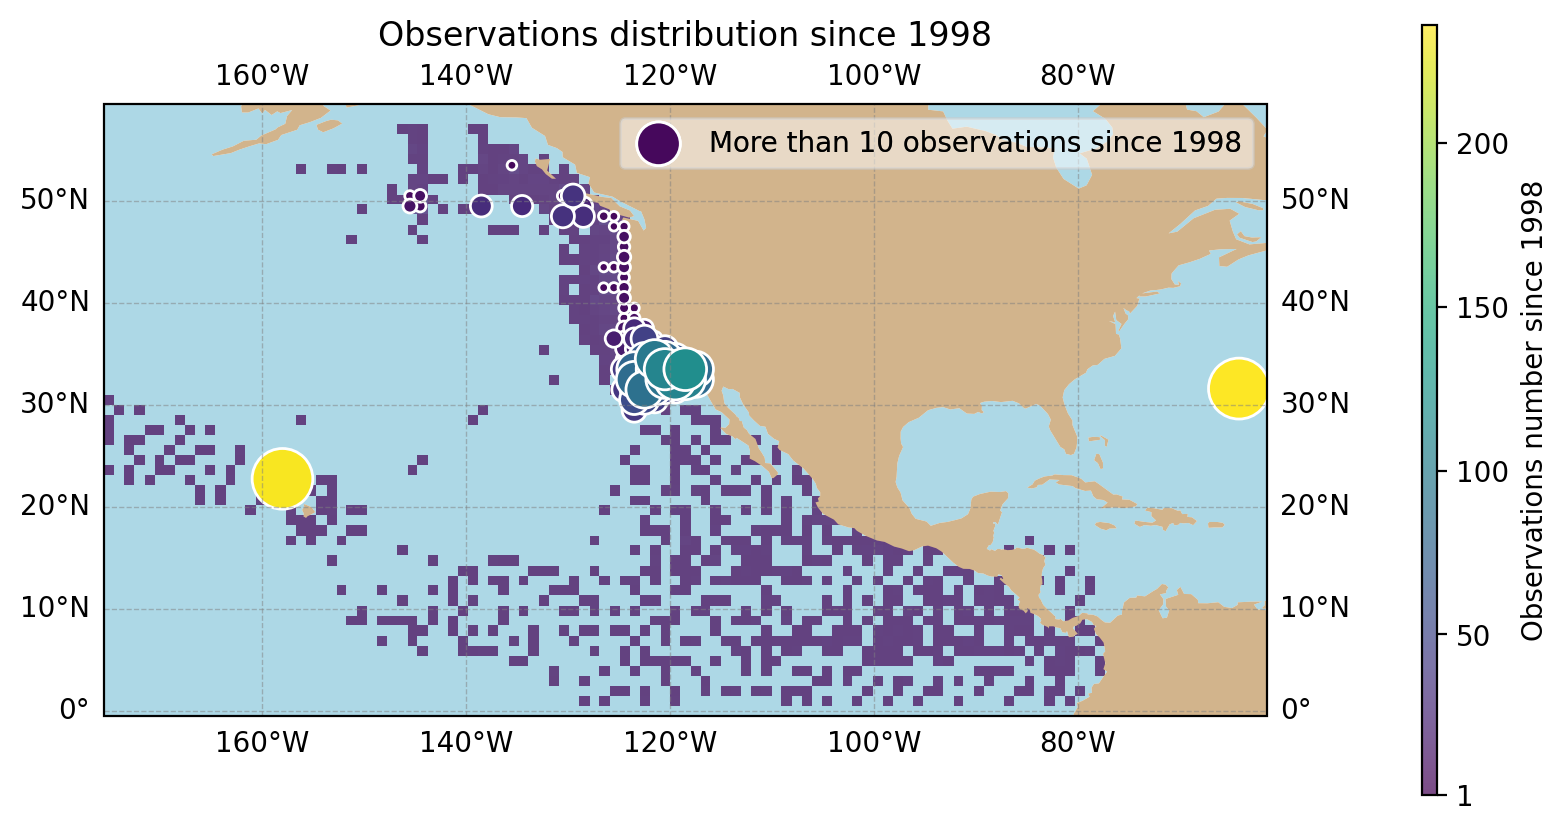

In [249]:
sample_count_1998 = (
    mean_zoo.count(axis=1)
    .reset_index()
    .query("time >= 1998")
    .drop(columns="time")
    .groupby(["latitude", "longitude"])
    .sum()
    .iloc[:, 0]
    .rename("sample_count_since_1998")
)
tmp = sample_count_1998[sample_count_1998 > 10].sort_values(ascending=True)
tmp_da = xr.DataArray.from_series(sample_count_1998)


fig = plt.figure(figsize=(10, 5), dpi=200)

projection = crs.PlateCarree(central_longitude=-110)

ax = fig.add_subplot(1, 1, 1, projection=projection)
ax.set_extent(extent, crs=crs.PlateCarree())

# ajoute une feature pour les terres
ax.add_feature(feature.LAND, facecolor="tan", zorder=1)
ax.add_feature(feature.OCEAN, facecolor="lightblue", zorder=-1)


img_scatter = ax.scatter(
    tmp.index.get_level_values("longitude"),
    tmp.index.get_level_values("latitude"),
    c=tmp.values,
    s=tmp.values,  # Scale the size of the points
    cmap="viridis",
    transform=crs.PlateCarree(),
    # marker avec un contour blanche
    edgecolor="white",
    vmin=1,
)
ax.gridlines(draw_labels=True, linewidth=0.5, color="gray", alpha=0.5, linestyle="--")

img_raster = ax.imshow(
    tmp_da.reindex(
        longitude=longitude,
        latitude=latitude,
        method="nearest",
        tolerance=0.5,
    ),
    origin="lower",
    extent=extent,
    transform=crs.PlateCarree(),
    cmap="viridis",
    interpolation="nearest",
    alpha=0.7,
    zorder=0,
)
cbar = plt.colorbar(img_raster, ax=ax, orientation="vertical", pad=0.1, aspect=50)
cbar.set_label("Observations number since 1998")
cbar.set_ticks([1, 50, 100, 150, 200])


legend1 = ax.legend(
    [img_scatter],
    ["More than 10 observations since 1998"],
    loc="upper right",
    framealpha=0.3,
)
ax.add_artist(legend1)

plt.title("Observations distribution since 1998")
plt.show()

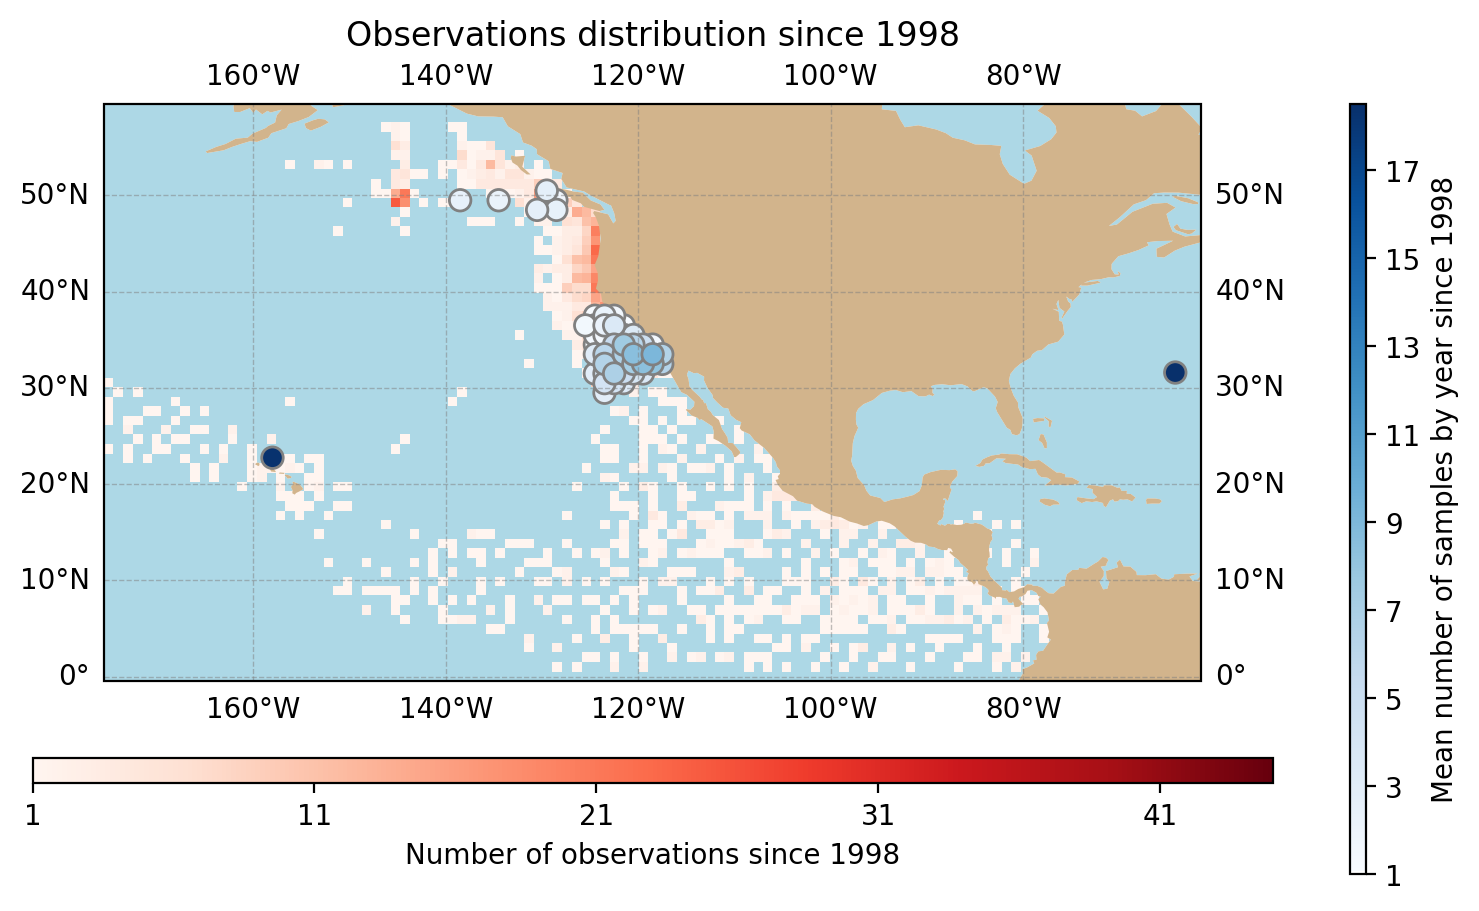

In [248]:
max_sample = 50

sample_count_mean_by_year = (
    sample_count_by_year.reset_index()
    .query("time >= 1998")
    .groupby(["latitude", "longitude"])[0]
    .mean()
    .rename("mean_sample_count")
)
tmp_da = xr.DataArray.from_series(sample_count_1998)
tmp_da = tmp_da.where(tmp_da < max_sample, np.nan)

tmp = sample_count_mean_by_year[sample_count_mean_by_year >= 1].sort_values(
    ascending=True
)


fig = plt.figure(figsize=(10, 5), dpi=200)

projection = crs.PlateCarree(central_longitude=-110)

ax = fig.add_subplot(1, 1, 1, projection=projection)
ax.set_extent(extent, crs=crs.PlateCarree())

# ajoute une feature pour les terres
ax.add_feature(feature.LAND, facecolor="tan", zorder=1)
ax.add_feature(feature.OCEAN, facecolor="lightblue", zorder=-1)


img_scatter = ax.scatter(
    tmp.index.get_level_values("longitude"),
    tmp.index.get_level_values("latitude"),
    c=tmp.values,
    # s=tmp.values * 10,  # Scale the size of the points
    s=60,
    cmap="Blues",
    transform=crs.PlateCarree(),
    # marker avec un contour blanche
    edgecolor="grey",
)
ax.gridlines(draw_labels=True, linewidth=0.5, color="gray", alpha=0.5, linestyle="--")

img_raster = ax.imshow(
    tmp_da.reindex(
        longitude=longitude,
        latitude=latitude,
        method="nearest",
        tolerance=0.5,
    ),
    origin="lower",
    extent=extent,
    transform=crs.PlateCarree(),
    cmap="Reds",
    interpolation="nearest",
    # alpha=0.7,
    zorder=0,
    vmin=1,
)
cbar = plt.colorbar(img_scatter, ax=ax, orientation="vertical", pad=0.05, aspect=50)
cbar.set_label("Mean number of samples by year since 1998")
cbar.set_ticks(np.arange(1, 19, 2))

cbar_raster = plt.colorbar(
    img_raster, ax=ax, orientation="horizontal", pad=0.1, aspect=50
)
cbar_raster.set_label("Number of observations since 1998")
cbar_raster.set_ticks(np.arange(1, max_sample, 10))

plt.title("Observations distribution since 1998")
plt.show()